In [1]:
# First we need to import all the necessary toolboxes...
from scipy.optimize import fsolve 
# import all the standard math functions and plotting stuff we'd want from numpy and matplotlib
from numpy import*
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 

# Chapter 3: Fuel Rod example

In this example, we are to calculate the ideal thickness for the cladding surrounding a nuclear fuel rod. The Thorium fuel rod (dia = 25 mm) uniformly generates heat at a rate of 7x10$^8$ W/m$^3$ and is clad in a thin layer of aluminium. The system is cooled via coolant (T$_\infty$ = 95$^oC$), which results in $h$ = 7,000 W/m$^2$K.

## Assumptions:
- steady state
- 1-D conduction (radial)
- all $\dot{q}_{gen}$ goes out radially such that $\left[\frac{W}{m}\right] q' = \dot{q}_{gen} \pi r^2_1$
- constant properties (i.e., $k$'s)

These assumptions allow us to use a series of thermal resistances such that the total resistance is the sum of the conductive and convective resitances from the surface temp of the fuel rod ($T_s$) to $T_\infty$.

$$
q' = \frac{T_s - T\infty}{R'_{tot}} = \frac{T_s - T\infty}{\frac{ln(r_2/r_1)}{2\pi k} + \frac{1}{h2\pi r_2}}
$$

...but we can also write $q'$ as a function of the temp on the outer surface of the cladding ($T_i$)

$
T_s = q' R'_{tot} + T_\infty
$

$
T_i = T_s - q' R'_{conv}
$

In [2]:
## Set the constants
r1 = 0.0125  # m
kTh = 54  # W/mk at 1200K - from Table A.1
kAl = 237  # W/mk at 800K
h = 7000  # W/m2K
Tinf = 95 + 273  # K
qD = 7e8  # qD = W/m3
qp = 7e8 * pi * r1**2  # W/m

Rc = kAl/h-r1  # Critical cladding thickness
print(f'The critical radius is k_Al / h = {(kAl/h)*1000:0.2f} mm')
print(f'The critical thickness is {Rc*1000:0.2f} mm')

The critical radius is k_Al / h = 33.86 mm
The critical thickness is 21.36 mm


In [3]:
# Cladding can be thought of as an insulation
rr2 = linspace(r1, Rc*10)  # cladding radius space
RR2 = rr2 - r1  # Plotting space adjusted to show cladding thickness [m]

Rcond = log(rr2/r1)/(2*pi*kAl)
Rconv = 1/(h*2*pi*rr2)
Rtot = Rcond + Rconv
Ts = qp*Rtot + Tinf
Ti = Ts - qp*Rcond

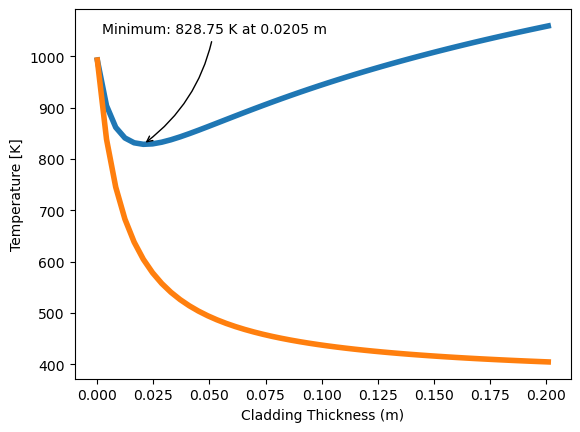

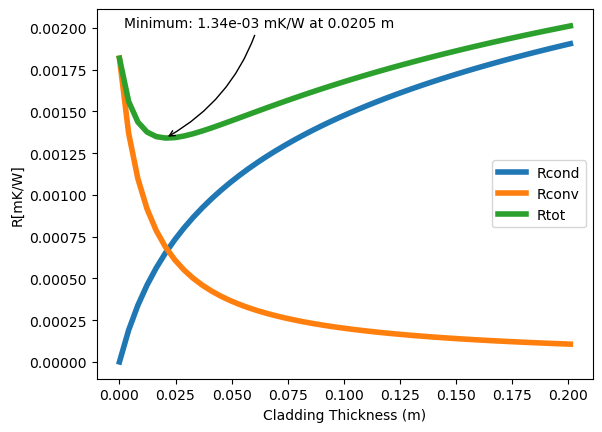

In [4]:
# Fig 1 shows surface temps of rod and cladding
fig, ax = plt.subplots()
ax.plot(RR2, Ts, '-', linewidth=4, label='T_S')
ax.plot(RR2, Ti, '-', linewidth=4, label='T_I')
ax.set_xlabel('Cladding Thickness (m)')
ax.set_ylabel('Temperature [K]')
# add a label to the minimum of the T_s curve
min_index = argmin(Ts)
min_thickness = RR2[min_index]
min_Ts = Ts[min_index]
ax.annotate(f"Minimum: {min_Ts:.2f} K at {min_thickness:.4f} m",
            xy=(min_thickness, min_Ts), xycoords='data',
            xytext=(-30, 80), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),
            )

# Fig 2 shows the various thermal resistances
fig, ax = plt.subplots()
ax.plot(RR2, Rcond, '-', linewidth=4, label='Rcond')
ax.plot(RR2, Rconv, '-', linewidth=4, label='Rconv')
ax.plot(RR2, Rtot, '-', linewidth=4, label='Rtot')
ax.set_xlabel('Cladding Thickness (m)')
ax.set_ylabel('R[mK/W]')
ax.legend()
# add a label to the minimum of the total resistance curve
min_index = argmin(Rtot)
min_thickness = RR2[min_index]
min_Rtot = Rtot[min_index]
ax.annotate(f"Minimum: {min_Rtot:.2e} mK/W at {min_thickness:.4f} m",
            xy=(min_thickness, min_Rtot), xycoords='data',
            xytext=(-30, 80), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),
            )

plt.show()